In [ ]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)

In [6]:
#Utilizar el nombre de la FUNCIÓN PREdefinida y la ruta de acceso (path) al archivo .csv de interés
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,PLZ07F,10/2/2021,Palizada,Coast,PLZ07,Bottom,Dry,8.37,36889.2,2.829,...,7.92,22.81,36170.8,56.65,26.040,18.58745,-91.83044,2715,2851,2851.0
102,PLZ08S,10/2/2021,Palizada,Coast,PLZ08,Surface,Dry,2.73,37133.6,0.363,...,8.39,22.57,35851.5,5.90,26.872,18.64028,-91.86907,2638,2837,2837.0
103,PLZ08F,10/2/2021,Palizada,Coast,PLZ08,Bottom,Dry,9.27,39340.8,5.185,...,7.89,24.53,38622.9,173.00,25.973,18.63984,-91.86890,2608,2857,2857.0
104,PLZ09S,10/2/2021,Palizada,Coast,PLZ09,Surface,Dry,3.71,37034.5,0.384,...,8.62,22.57,35851.9,9.18,26.727,18.66676,-91.90047,2605,2804,2804.0


In [ ]:
#Definir una VARIABLE para poder manipular el DataFrame (no solo visualizarlo)
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [ ]:
terminos_df  #Visualizar el DataFrame

# 09 Mann-Whitney U test

In [8]:
from scipy.stats import mannwhitneyu

#Crear una FUNCIÓN para realizar la prueba de Mann-Whitney U
def mann_whitney_test(data1, data2, alpha=0.05):
   
    """Performs the Mann-Whitney U test and prints U statistic, p-value, and result."""
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    #Crear una f-string (permite insertar variables dentro del texto usando {}). Aquí, esto permite acceder a los ATRIBUTOS statistic y pvalue del OBJETO result
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    #Crear una CONDICIONAL para interpretar el resultado. pvalue < 0.05 es estadisticamente significativo
    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

In [9]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

c:\Users\JudithP.DESKTOP-RHSB5HU\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JudithP.DESKTOP-RHSB5HU\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


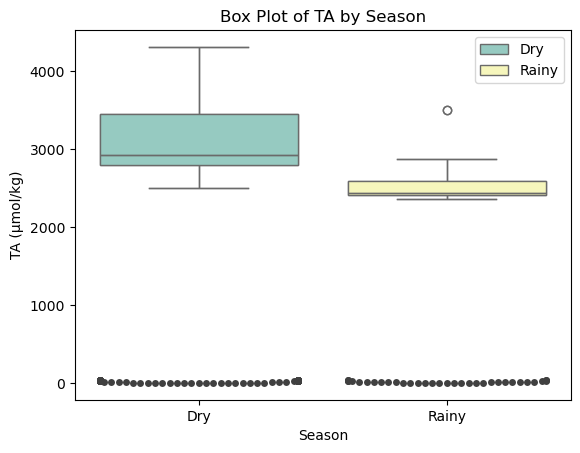

In [ ]:
#Importar las paqueterías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TA by season
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos_df, palette="Set3", hue="season",legend=False) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos_df, palette="Set3", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=True si quieres mostrar la leyenda.
sns.swarmplot(x='season', y='sal_psu', data=terminos_df, color=".25", size=10) 

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()